# 阈值处理

In [1]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import skimage as ski
import skimage.color as skcolor
import skimage.io as skio
from scipy.ndimage.interpolation import zoom

In [2]:
def simple_threshold(im, threshold=128):
    return ((im > threshold) * 255).astype("uint8")

In [9]:
src = skio.imread('../datas/f3.jpg')
gray = ski.img_as_ubyte(skcolor.rgb2gray(src))

C:\Users\jenson\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [20]:
dst = simple_threshold(gray,threshold=38)

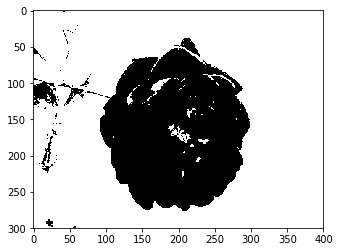

In [21]:
plt.imshow(dst,'gray')

In [23]:
def otsu_threshold(im):

    pixel_counts = [np.sum(im == i) for i in range(256)]
    # 得到图片的以0-255索引的像素值个数列表
    s_max = (0,-10)
    ss = []
    for threshold in range(256):
    # 遍历所有阈值，根据公式挑选出最好的

        # 更新
        w_0 = sum(pixel_counts[:threshold]) # 得到阈值以下像素个数
        w_1 = sum(pixel_counts[threshold:]) # 得到阈值以上像素个数

        mu_0 = sum([i * pixel_counts[i] for i in range(0,threshold)]) / w_0 if w_0 > 0 else 0
        # 得到阈值下所有像素的均值
        # 注意 if else 用法意义： 如果 w_0 > 0 则 mu_0 = sum/w_0 否则 mu_0 = 0
        mu_1 = sum([i * pixel_counts[i] for i in range(threshold, 256)]) / w_1 if w_1 > 0 else 0
        # 得到阈值上所有像素的均值

        # 根据公式计算
        s = 1.0 * w_0 * w_1 * (mu_0 - mu_1) ** 2
        # 直接使用w_0 * w_1可能会造成整数相乘溢出，所以先乘一个1.0变为浮点数
        ss.append(s)

        # 取最大的
        if s > s_max[1]:
            s_max = (threshold, s)

    return s_max[0]

In [28]:
thresh = otsu_threshold(gray)
dst = simple_threshold(gray,threshold=thresh)
print(thresh)

140


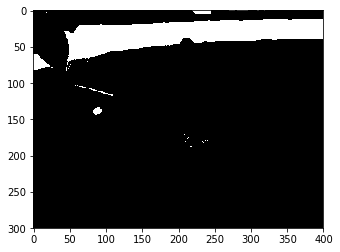

In [29]:
plt.imshow(dst,'gray')